<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


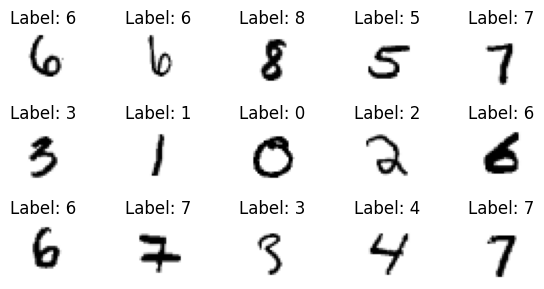

In [4]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [5]:
num_filter = [2, 3]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="relu",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='relu'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
mnist_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 3)           │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 507)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,127 (20.03 KB)

 Trainable params: 5,127 (20.03 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train_subset = x_train[:100]
label_train_subset = label_train[:100]

In [8]:
mnist_cnn_fit = mnist_cnn.fit(x_train_subset, label_train_subset, epochs = 10, batch_size = 10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1489 - loss: 3.4708
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1463 - loss: 2.4323 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0737 - loss: 2.4767 
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1106 - loss: 2.4544 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0910 - loss: 2.3351 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1539 - loss: 2.2613 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1143 - loss: 2.3032 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2024 - loss: 2.2554 
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1146 - loss: 2.2829 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2136 - loss: 2.2373 


In [9]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense']

In [15]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_1')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense')].get_weights()

In [16]:
conv2_W.shape

(2, 2, 2, 3)

In [32]:
def same_padding(images, filter_h, filter_w, stride):
    sample_size, img_h, img_w, _ = images.shape
    stride_h, stride_w = stride

    pad_h = ((stride_h-1)*img_h + filter_h - stride_h) // 2
    pad_w = ((stride_w-1)*img_w + filter_w - stride_w) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(images[n,:,:,:], ((pad_h, pad_h), (pad_w, pad_w), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [26]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           #h_end.append(h_end_value)
           w_start.append(w_start_value)
           #w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, w_start

In [27]:
def reLU(image):
  return np.maximum(0, image)

In [18]:
def Convo2D(images, filters, stride, padding):
    filter_h, filter_w, in_channels, out_channels = filters.shape
    sample_size, input_h, input_w, channels = images.shape

    if padding:
      img_padded = same_padding(images, filters, stride)
    else:
      images_pad = images



    # allocate an output array
    # the batch_size stays the same, the number of colors is specified in the shape of the filter
    # but the x and y dimensions of the output need to be calculated
    # the formula is:
    # out_x = in_x - filter_x +1
    out=np.empty((batch_size, dim_x-kernel_x+1, dim_y-kernel_y+1, out_colors))

    # look at every coordinate in the output
    for i in range(out.shape[1]):
        for j in range(out.shape[2]):

            # at this location, slice a rectangle out of the input image
            # the batch_size and the colors are retained
            # crop has the shape: batch_size, kernel_x, kernel_y, in_colors
            crop=im[:,i:i+kernel_x, j:j+kernel_y]

            # the values in crop will be multiplied by the weights
            # look how the shapes match:
            # crop:   batch_size, x, y, in_colors
            # weights:            x, y, in_colors, out_colors

            # numpy can broadcast this, but ONLY if an extra dimension is added to crop
            # crop now has the shape: batch_size, x, y, in_colors, 1
            crop=np.expand_dims(crop, axis=-1)

            # numpy broadcast magic
            # in parallel along the batch_size
            # matches the x, y and in_colors dimensions and multiplies them pairwise
            res=crop*weights

            # res has the shape: batch_size, x, y, in_colors, out_colors
            # we want to sum along x, y, and in_colors
            # those are the dimensions 1, 2, 3
            # we want to keep the batch_size and the out_colors
            res=np.apply_over_axes(np.sum, res, [1,2,3]).reshape(batch_size,-1)

            out[:,i,j]=res

    return out

In [ ]:
batch_size = 100
img_height = 28
img_width = 28
channels = 3  # RGB channels
num_filters = 2
kernel_size = 3
stride = (2, 2)  # Example stride of (2, 2)
padding = True
filters = np.random.randn(kernel_size, kernel_size, channels, num_filters)

# Initialize input images (random for this example)
images = np.random.randn(batch_size, img_height, img_width, channels)
images_pad = same_padding(images, filter = filters, stride=(1,1))
h_start_idx, h_end_idx, w_start_idx, w_end_idx = get_start_index(28, 28, 2, 2, kernel_size, kernel_size)

In [20]:
  convo1_out = convolve(x_train_subset, weights=conv1_W)

In [ ]:
def max_pooling(image, pool_size, stride):
    sample_size, img_height, img_width, channels = image.shape
    kernel_height, kernel_width = pool_size
    stride_height, stride_width = stride

    output_width = (img_width - kernel_width) // stride_width + 1
    output_height = (img_height - kernel_height) // stride_width + 1
    pooled_img = np.zeros((sample_size, output_height, output_width, channels))

    # max-pool
    for n in range(sample_size):
        sub_img = image[n]
        for c in range(channels):
          for i in range(output_height):
            for j in range(output_width):
                h_start_idx = i * stride_height
                h_end_idx = h_start_idx + kernel_height
                w_start_idx = j * stride_width
                w_end_idx = w_start_idx + kernel_width

                subsection = sub_img[h_start_idx:h_end_idx, w_start_idx:w_end_idx, c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [ ]:
convo1_output = convolve(x_train_subset, filter=conv1_W, stride=(1,1), bias=conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_output, pool_size=(2,2), stride=(1,1))
convo2_output = Convo2D(convo1_maxpool, filter=conv2_W, stride=(1,1), bias=conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_output, pool_size=(2,2), stride=(2,2))

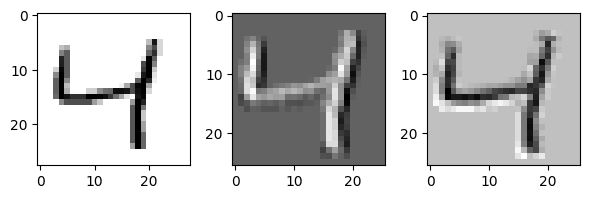

In [24]:
idx=2
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].imshow(x_train_subset[idx], cmap=matplotlib.cm.binary)
axs[1].imshow(convo1_out[idx,:,:,0], cmap=matplotlib.cm.binary)
axs[2].imshow(convo1_out[idx,:,:,1], cmap=matplotlib.cm.binary)
ax.axis('off')
plt.tight_layout()
plt.show()

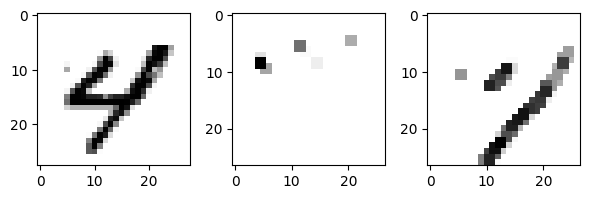

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].imshow(x_train_subset[idx], cmap=matplotlib.cm.binary)
axs[1].imshow(convo1_maxpool[idx,:,:,0], cmap=matplotlib.cm.binary)
axs[2].imshow(convo1_maxpool[idx,:,:,1], cmap=matplotlib.cm.binary)
#axs[3].imshow(convo2_output[idx,:,:,2], cmap=matplotlib.cm.binary)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def plot_images(data, labels, nrows=0, images_per_row=0):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(nrows):
      for j in range(images_per_row):
        ax = axes[i*images_per_row + j]
        ax.set_title(('Label {}'.format(labels[i])))
        ax.imshow(data[i, :, :, j], cmap=matplotlib.cm.binary)
        #ax.set_title(f"Image {j+1}, Channel {i+1}")
        ax.axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

In [ ]:
idx = np.random.randint(low=0, high=x_cnn.shape[0], size=(10,))
x_cnn_sampled = x_cnn[idx,:,:,:]
y_train_sampled = y_train[idx]
plot_images(x_cnn_sampled, y_train_sampled, x_cnn_sampled.shape[0], 10)

In [ ]:
!pip install gudhi
import gudhi as gd

In [ ]:
x_cnn_avg = np.mean(x_cnn, axis=3)
x_cnn_sampled_avg = x_cnn_avg[idx,:,:]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label {}'.format(y_train_sampled[i])))
    ax.imshow(x_cnn_sampled_avg[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
idx_barcode = np.random.randint(low=0, high=x_cnn.shape[0], size=(200,))
x_cnn_sampled_avg_barcode = x_cnn_avg[idx_barcode,:,:]
n_classes = x_cnn_sampled_avg_barcode.shape[0]
barcode_data = []

for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg_barcode[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

In [ ]:
barcode_data = pd.DataFrame(barcode_data, columns=['birth', 'death'])
barcode_data['class'] = y_train[idx_barcode]
barcode_data[:20]

In [ ]:
n_classes = x_cnn_sampled_avg.shape[0]
barcode_data = []

fig, ax = plt.subplots(n_classes, 2, figsize=(12, 3 * n_classes))  # 2 columns for diagrams and barcodes
for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    # plotting
    gd.plot_persistence_diagram(pers, axes=ax[i, 0])
    ax[i, 0].set_title('Label {} - Persistence Diagram'.format(y_train_sampled[i]))
    gd.plot_persistence_barcode(pers, axes=ax[i, 1])

    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

plt.tight_layout()
plt.show()

In [ ]:
mnist_cnn.add(Flatten())
#mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 30, batch_size = 250, validation_data=(x_test, label_test))

In [ ]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
Y_pred = mnist_cnn.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(label_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install nibabel
import nibabel